# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [3]:
from sklearn import cluster, datasets

kmeans = cluster.KMeans(n_clusters=8)
kmeans.fit(X)
y_pred = kmeans.predict(X)

In [4]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, y_pred)
score # cuanto más alto mejor

# El silhouette score indica la separación de los centroides de cada cluster. Cuanto más alto el silhouette score, 
# más separados están los centroides de cada cluster, por lo que hay más separación de datos hay. 
# Un silohuette score de 0 indica que los dos centroides están superpuestos, es el peor caso porque no hay separación de datos.

0.5398971441034137

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [5]:
kmeans = cluster.KMeans(n_clusters=5)
kmeans.fit(X)
y_pred = kmeans.predict(X)
score = silhouette_score(X, y_pred)
score # cuanto más alto mejor

0.5489993239795691

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [6]:
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)
score = silhouette_score(X, y_pred)
score # cuanto más alto mejor

0.5711381937868844

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

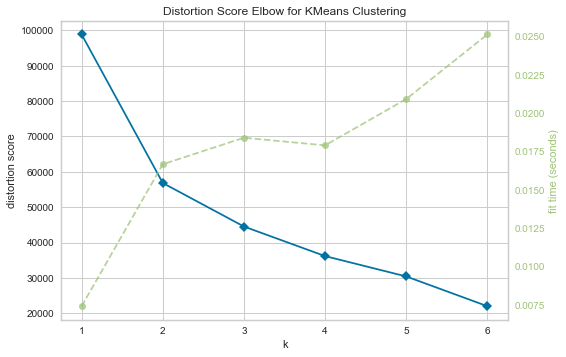

In [7]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,7), metric='distortion')
visualizer.fit(X)
visualizer.poof()

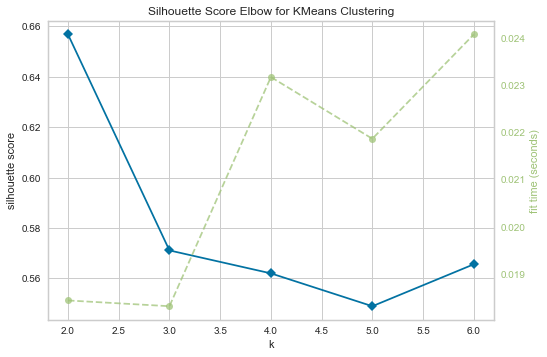

In [8]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,7), metric='silhouette')
visualizer.fit(X)
visualizer.poof()

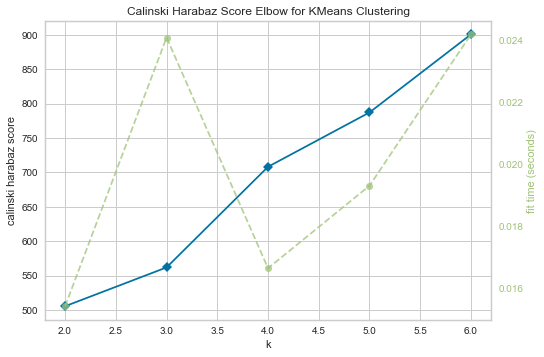

In [9]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,7), metric='calinski_harabaz')
visualizer.fit(X)
visualizer.poof()

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [10]:
single = cluster.AgglomerativeClustering(n_clusters=8, linkage='single')
single.fit(X)
y1_pred = single.labels_.astype(np.int)
silhouette_score(X, y1_pred)

0.4231857440030851

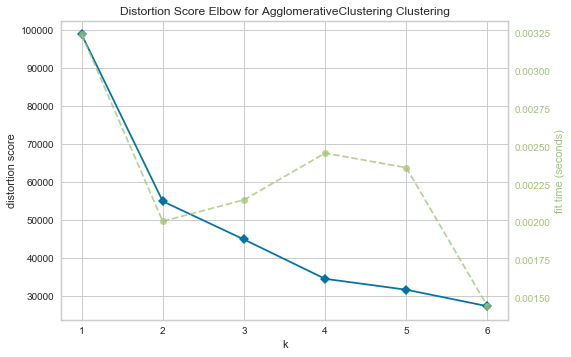

In [11]:
model = cluster.AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(1,7))
visualizer.fit(X)
visualizer.poof()

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

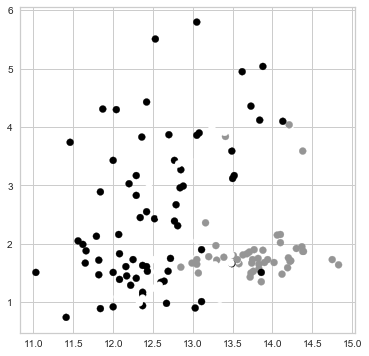

In [13]:
plt.figure(figsize=(6,6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_pred)

/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


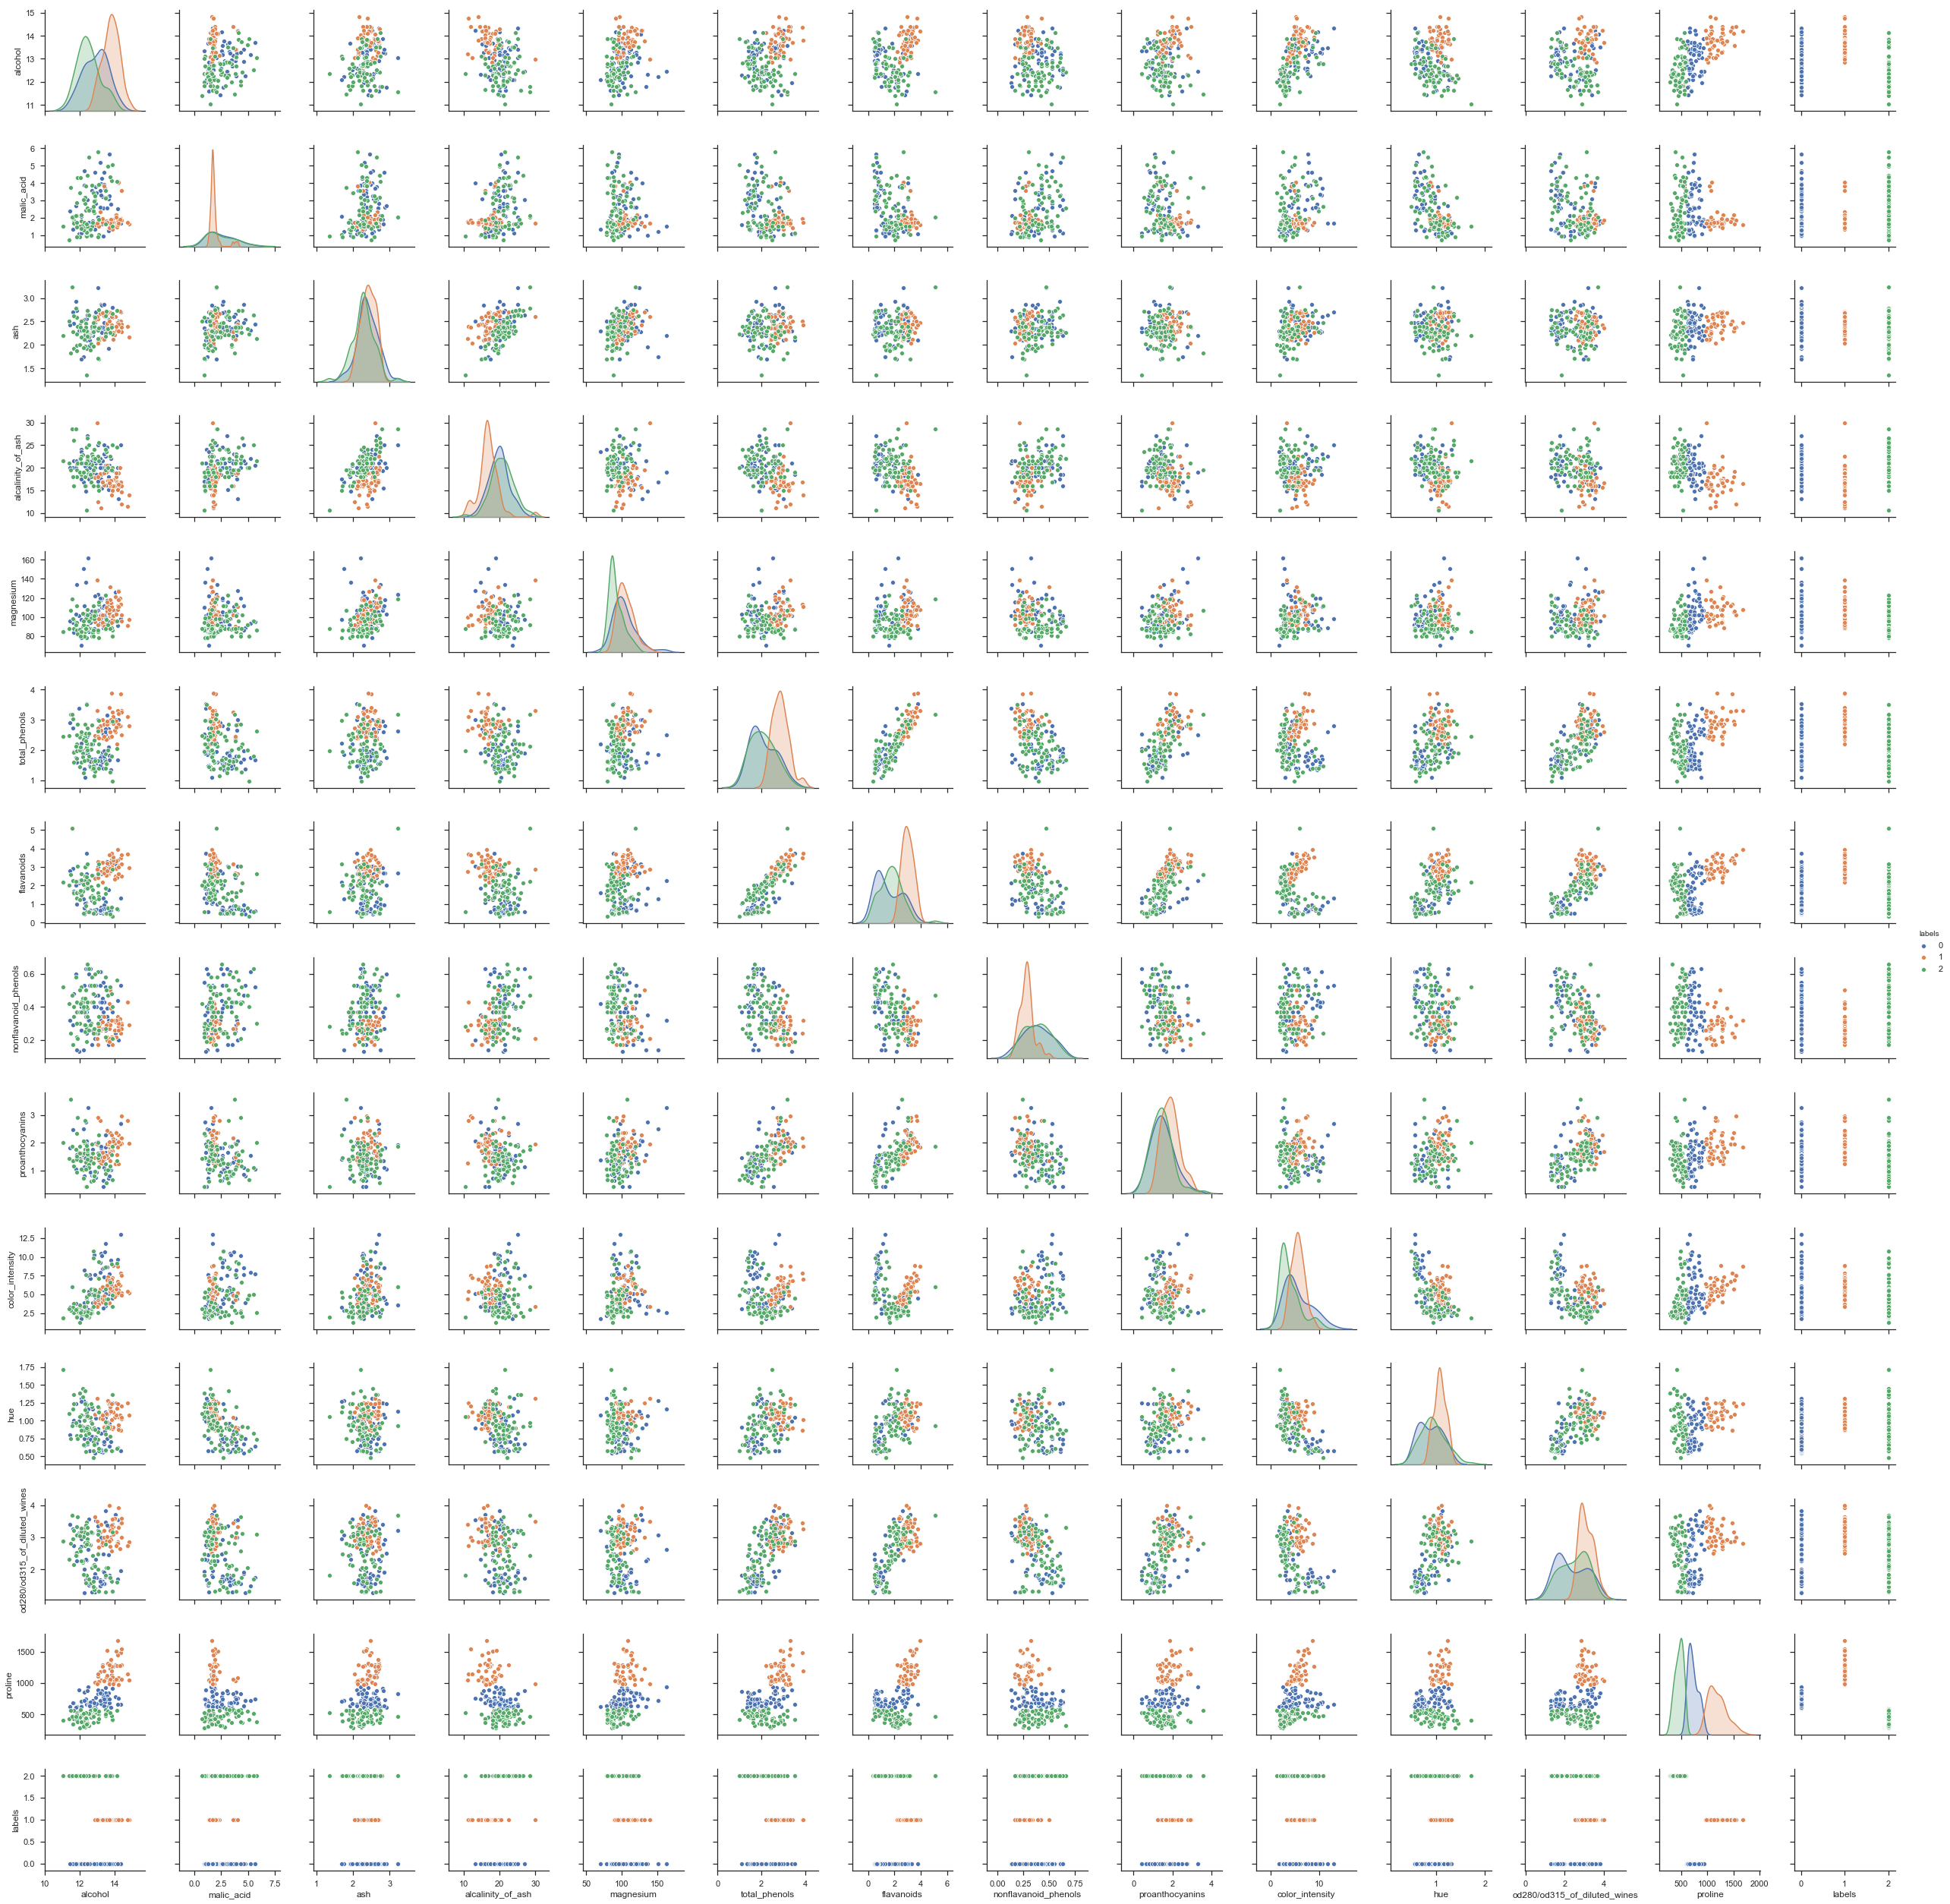

In [14]:
import seaborn as sns

kmeans = cluster.KMeans(n_clusters=3)

data_clusters = kmeans.fit(X)

X['labels'] = data_clusters.labels_

sns.set(style="ticks", color_codes=True)

sns.pairplot(X, hue = 'labels')

In [15]:
#import seaborn as sns
#sns.set(style="ticks")

#df = X
#sns.pairplot(df)

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

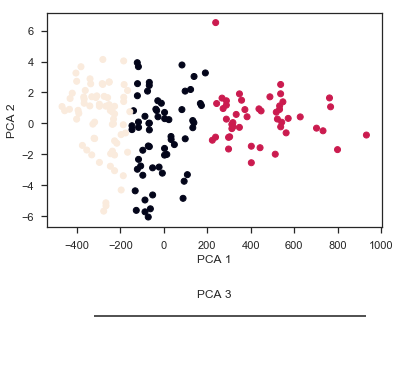

In [16]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)
pca_X = pca.transform(X)

fig = plt.figure(figsize=(6, 6))
ax = [plt.subplot2grid((6, 1), (0, 0), rowspan=4), plt.subplot2grid((6, 1), (5, 0))]

ax[0].scatter(pca_X[:, 0], pca_X[:, 3], c = X['labels'] )
ax[0].set_xlabel("PCA 1")
ax[0].set_ylabel("PCA 2")

ax[1].set_title('PCA 3', pad=-5)
ax[1].hlines(1, -7, 10)
y = np.ones(X.shape[0])
ax[1].plot(pca_X[:, 2], y, '|', ms='20')
ax[1].axis('off')

plt.show()

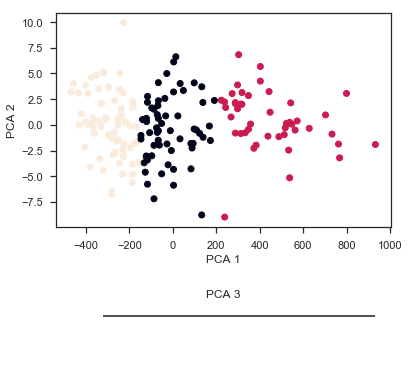

In [18]:
pca = PCA()
pca.fit(X)
pca_X = pca.transform(X)

fig = plt.figure(figsize=(6, 6))
ax = [plt.subplot2grid((6, 1), (0, 0), rowspan=4), plt.subplot2grid((6, 1), (5, 0))]

ax[0].scatter(pca_X[:, 0], pca_X[:, 2], c = X['labels'] )
ax[0].set_xlabel("PCA 1")
ax[0].set_ylabel("PCA 2")

ax[1].set_title('PCA 3', pad=-5)
ax[1].hlines(1, -7, 10)
y = np.ones(X.shape[0])
ax[1].plot(pca_X[:, 2], y, '|', ms='20')
ax[1].axis('off')

plt.show()

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

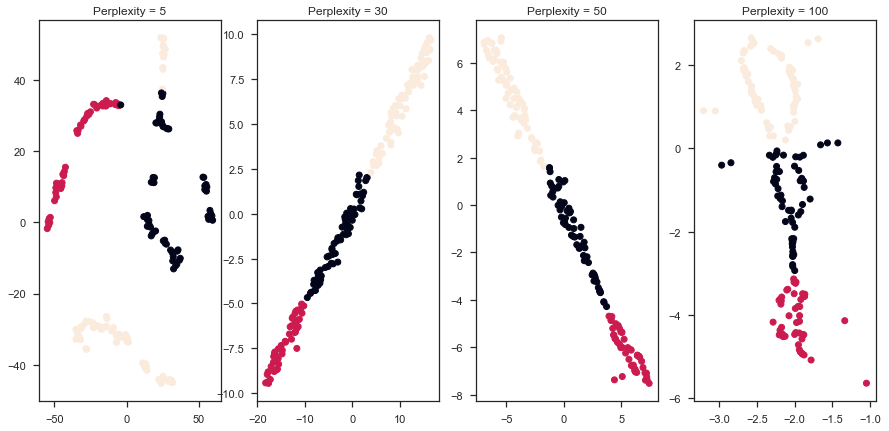

In [23]:
from sklearn.manifold import TSNE

fig, ax = plt.subplots(1, 4, figsize=(15, 7))
for i, perp in enumerate([5, 30, 50, 100]):
    tsne = TSNE(perplexity=perp)
    x_embedded = tsne.fit_transform(X)
    ax[i].scatter(x_embedded[:, 0], x_embedded[:, 1], c=X['labels'])
    ax[i].set_title("Perplexity = {}".format(perp))
    
plt.show()